##**LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import os
from google.cloud import bigquery
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#please adjust the path from your drive
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/db_bitlabs/private-keys.json"

In [ ]:
!pip install pandasql
import pandasql

from pandasql import sqldf 
sql_run = lambda q: sqldf(q, globals())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**SQL**

In [ ]:
bqclient = bigquery.Client()

# Download query results.
query_string = """
SELECT *, (price * product_quantity) as gmv,
  ((price * product_quantity)*percentage_commission) as revenue 
  FROM `bitlabs-dab.G_CID_01.ralali_transactions_Q1_2018`
UNION ALL
SELECT *, (price * product_quantity) as gmv,
  ((price * product_quantity)*percentage_commission) as revenue 
  FROM `bitlabs-dab.G_CID_01.ralali_transactions_Q1_2019`
UNION ALL
SELECT *, (price * product_quantity) as gmv,
  ((price * product_quantity)*percentage_commission) as revenue 
  FROM `bitlabs-dab.G_CID_01.ralali_transactions_Q1_2020`
"""

df = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
    )
)

NameError: ignored

## Dataframe (Before Cleansing)

In [ ]:
df

,order_id,oder_detail_id,order_datetime,item_id,item_name,cat_name,price,product_quantity,percentage_commission,payment_method,...,received_datetime,settled_datetime,buyer_id,seller_id,order_source,buyer_province_name,buyer_city_name,logistic_name,gmv,revenue
0,vWtd1y0/6huGN2/XeVvDsuZQoDwatiNmUATDyiR+T176ru...,5F+Im4Nc+NUSZqLbx+X1eDrweIh5M0spYtS/UdcVA7aaJ+...,2018-01-24 23:08:46+00:00,FiwEDZtpOyYWv3+YJlwOSL3tBRSsNNNNDddisUbym/nJPF...,IC LOCK Alarm Sepeda Motor Tipe 1L 1 Sandi,Automotive & Transportation,70000.0,11,0.0,BCA Bank Transfer,...,2018-01-31 22:05:59+00:00,2018-02-02 11:11:11+00:00,4bS8qFKVzWcs1YbiN1AH69caS28RLKfoD9Sw5mhywcKLRy...,+4nL+1ptdvhVGUOs4XRPWrfX7udjVZHeHD5QumR31VzOzx...,website,Banten,Tangerang,SAP Express,770000.0,0.0
1,hYo6AokZ1bqrZlrc/eMvqqaODQGiv5/TmUFtzkYTuY5jDZ...,X1hbQ/Sk8go6uIIMeGCtodTT1RHe747Bfix4NRcsVSMVMw...,2018-03-12 15:18:13+00:00,GYSx7Gu3Wy/DC3c/QEHBotPs/OIE1QDfKwTyWqEHhb626J...,Sleeping Bag Ultralight Packing,"Beauty, Sport & Fashion",106900.0,11,0.0,BCA Bank Transfer,...,2018-03-17 17:33:12+00:00,2018-03-19 17:49:29+00:00,gIMTtuVLpqhxr1vGQUX7z/9BsLfyuIEsw9adNH5RFCmJoJ...,+7J29u1/MoqIdao5nXk+a154wh0xn5yHpNAlO+cMMagBg3...,website,Jawa Barat,Bandung,TIKI,1175900.0,0.0
2,aZYLoHJEF14rPOHWczVrCzZHEbwv72w9yVEOtCVNQoeA3+...,GR22NQrEEEj8H0xYK5+06Ivz/pw7kkM6PRfduolAeb2waS...,2018-02-01 20:16:19+00:00,GYSx7Gu3Wy/DC3c/QEHBotPs/OIE1QDfKwTyWqEHhb626J...,Sleeping Bag Ultralight Packing,"Beauty, Sport & Fashion",106900.0,11,0.0,Mandiri Bank Transfer,...,2018-02-03 13:48:44+00:00,2018-02-05 11:37:35+00:00,iAM0QYDk/thCNhc2NLA5XjAH/wCIcbwgWXK3DpWRfOiohn...,+7J29u1/MoqIdao5nXk+a154wh0xn5yHpNAlO+cMMagBg3...,website,Dki Jakarta,Jakarta Pusat,TIKI,1175900.0,0.0
3,aYEM8mBNtgtgtwiXy8o7KoVr7dD8S6remri7NnvTgFprLo...,I224XW2xDNCFAAe6UMFftC9alJNKABfKg9GKaNlLaYKyJI...,2018-01-15 15:49:58+00:00,GYSx7Gu3Wy/DC3c/QEHBotPs/OIE1QDfKwTyWqEHhb626J...,Sleeping Bag Ultralight Packing,"Beauty, Sport & Fashion",106900.0,11,0.0,BNI Bank Transfer,...,2018-01-22 05:12:20+00:00,2018-01-23 10:55:22+00:00,VNegkSBXo6FoVwuapctbPQhm52bDXytLzTfg4jeLYvUYZC...,+7J29u1/MoqIdao5nXk+a154wh0xn5yHpNAlO+cMMagBg3...,website,Banten,Tangerang,TIKI,1175900.0,0.0
4,fLtNp9wUwKF9DdhOTfsq9mBjgBiPGTYdIVIthaxC5klNh8...,4o+vKqCoSfwwEga/7WeHhYwpvRT9NN7G+u2yhnQuAiv+72...,2018-01-15 15:01:33+00:00,GYSx7Gu3Wy/DC3c/QEHBotPs/OIE1QDfKwTyWqEHhb626J...,Sleeping Bag Ultralight Packing,"Beauty, Sport & Fashion",106900.0,11,0.0,Credit Card,...,2018-01-16 23:00:51+00:00,2018-01-18 17:50:05+00:00,u+5n7OUaW4Az4ltUSf1kdFhb7aAbCYuQyNDuEDAQNucW5x...,+7J29u1/MoqIdao5nXk+a154wh0xn5yHpNAlO+cMMagBg3...,website,Dki Jakarta,Jakarta Barat,JNE,1175900.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56994,hMNVJu7pe/56r9IMer9EOhMaspNepjbOjY+yzwuxhbyMeX...,ubvMK0JvvfzZqdH7NPiZDJfMtaWZF0JMKJ0flm/n/BrYXj...,2020-03-17 08:11:07+00:00,qmY+fo95UnBw5KEdLm+TUDGqv9YHywZCrCDPqFHXNMmO3y...,LENCANA MERAH Tepung Terigu 1kg,Agriculture & Food,20000.0,11,3.0,Ralali Wallet,...,2020-03-17 08:12:00+00:00,2020-03-18 19:16:18+00:00,XS4ZXBjDD6JvT8hoJkwLFFWDEzJRDxfjXEngv1L5OstM7e...,zur/s7B3E92bxS8FkBL9Dx6HA7lKKWGGzSq1qu4HPScnu9...,Android,Kepulauan Riau,Pekanbaru,Free Ongkir Lokal,220000.0,660000.0
56995,Kyr1swAjeR37xIsuF5FDUbp7QtkHWpbNByLa/Smk4It3Jv...,GEn8zsO7m+zvxgj7NUqs9HBwHFOfpA+YY1sbpRq+r5X12f...,2020-01-28 00:57:59+00:00,qmY+fo95UnBw5KEdLm+TUDGqv9YHywZCrCDPqFHXNMmO3y...,LENCANA MERAH Tepung Terigu 1kg,Agriculture & Food,20000.0,11,3.0,Ralali Wallet,...,2020-02-11 00:38:55+00:00,2020-02-12 06:22:14+00:00,yY7Y1kBC0st9xepDZscxyihC+92wnAgt7Su6zegHLKgmRs...,zur/s7B3E92bxS8FkBL9Dx6HA7lKKWGGzSq1qu4HPScnu9...,Android,Riau,Pekanbaru,Free Ongkir Lokal,220000.0,660000.0
56996,vUVI5D2/Fkw+uJCP/prvGKQR7pS6ysgu+YBpy7XKD0LDfI...,wgTA6Nj4X0Sg+468a/zs6g41zZhMOzhScQA4z9kkRSJ8Mt...,2020-01-28 00:51:48+00:00,qmY+fo95UnBw5KEdLm+TUDGqv9YHywZCrCDPqFHXNMmO3y...,LENCANA MERAH Tepung Terigu 1kg,Agriculture & Food,20000.0,11,3.0,Ralali Wallet,...,2020-02-11 00:37:00+00:00,2020-02-12 

###DF Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56999 entries, 0 to 56998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   order_id               56999 non-null  object             
 1   oder_detail_id         56999 non-null  object             
 2   order_datetime         56999 non-null  datetime64[ns, UTC]
 3   item_id                56999 non-null  object             
 4   item_name              56999 non-null  object             
 5   cat_name               56999 non-null  object             
 6   price                  56999 non-null  float64            
 7   product_quantity       56999 non-null  Int64              
 8   percentage_commission  56999 non-null  float64            
 9   payment_method         56999 non-null  object             
 10  payment_datetime       56999 non-null  datetime64[ns, UTC]
 11  processed_datetime     53325 non-null  datetime64[ns, 

## **A. Data Description**

#####Modus, Median, Mean Revenue and GMV

In [ ]:
print('--GMV--')
print('Mean : ',df['gmv'].mean())
print('Median :',df['gmv'].median())
print('Modus : ',df['gmv'].mode())
print('')
print('--REVENUE--')
print('Mean : ',df['revenue'].mean())
print('Median :',df['revenue'].median())
print('Modus : ',df['revenue'].mode())

--GMV--
Mean :  10486178.5187284
Median : 1287000.0
Modus :  0    1210000.0
dtype: float64

--REVENUE--
Mean :  19090481.013842348
Median : 2706000.0
Modus :  0    0.0
dtype: float64


####Top 5 order by provinces

Text(0.5, 1.0, 'Top 5 order by provinces')

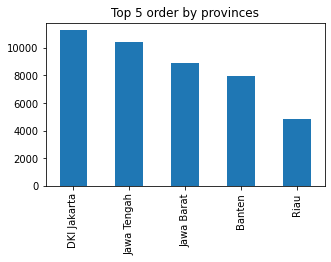

In [ ]:
top_5_city = df['buyer_province_name'].value_counts()[:5]
top_5_city.plot(kind='bar',figsize=(5,3))
plt.title('Top 5 order by provinces')

####Top 5 order by category

Text(0.5, 1.0, 'Top 5 order by category')

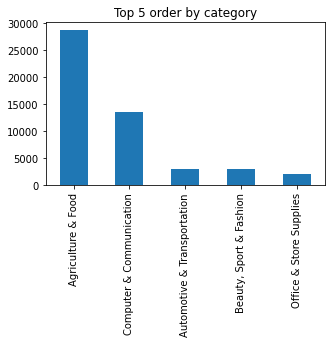

In [ ]:
top_5_cat = df['cat_name'].value_counts()[:5]
top_5_cat.plot(kind='bar',figsize=(5,3))
plt.title('Top 5 order by category')

####GMV and revenue base on category

In [ ]:
sql_query = """
SELECT cat_name AS Cat_Name,gmv,revenue
  FROM df
  WHERE payment_datetime IS NOT NULL AND received_datetime IS NOT NULL
  GROUP BY cat_name
"""

sql_run(sql_query)

,Cat_Name,gmv,revenue
0,Agriculture & Food,319000.0,957000.0
1,Automotive & Transportation,300000.0,750000.0
2,"Beauty, Sport & Fashion",660000.0,3960000.0
3,Building Materials,23028500.0,46057000.0
4,Computer & Communication,2171000.0,4342000.0
5,Electronics,62535000.0,125070000.0
6,Furnitures & Decorations,1488000.0,4464000.0
7,Health & Medical,1219200.0,6096000.0
8,Horeca,459200.0,2296000.0
9,Machinery & Industrial Parts,8677760.0,43388800.0


## **B. Missing Value**

In [ ]:
df.isnull().sum()

order_id                    0
oder_detail_id              0
order_datetime              0
item_id                     0
item_name                   0
cat_name                    0
price                       0
product_quantity            0
percentage_commission       0
payment_method              0
payment_datetime            0
processed_datetime       3674
delivered_datetime       4004
received_datetime        3712
settled_datetime         3920
buyer_id                    0
seller_id                   0
order_source                0
buyer_province_name         4
buyer_city_name             4
logistic_name               0
gmv                         0
revenue                     0
dtype: int64

Di sini dapat kita lihat ada 6 kolom dengan missing values:
- Kolom `processed_datetime` : ada 3674 baris yang kosong
- Kolom `delivered_datetime` : ada 4004 baris yang kosong
- Kolom `received_datetime`  : ada 3712 baris yang kosong
- Kolom `settled_datetime`   : ada 3920 baris yang kosong
- Kolom `buyer_province_name`: ada 4 baris yang kosong
- Kolom `buyer_city_name`    : ada 4 baris yang kosong

Tetapi hanya kolom `buyer_province_name` dan `buyer_city_name` yang akan diisi baris yang kosong karena untuk kolom lainnya wajar jika kosong dan menandakan bahwa proses itu tidak selesai

###Filling the missing value with mode

In [ ]:
df['buyer_province_name'] = df['buyer_province_name'].fillna(df['buyer_province_name'].mode()[0])
df['buyer_city_name'] = df['buyer_city_name'].fillna(df['buyer_city_name'].mode()[0])
df.isnull().sum()

order_id                    0
oder_detail_id              0
order_datetime              0
item_id                     0
item_name                   0
cat_name                    0
price                       0
product_quantity            0
percentage_commission       0
payment_method              0
payment_datetime            0
processed_datetime       3674
delivered_datetime       4004
received_datetime        3712
settled_datetime         3920
buyer_id                    0
seller_id                   0
order_source                0
buyer_province_name         0
buyer_city_name             0
logistic_name               0
gmv                         0
revenue                     0
dtype: int64

Missing value pada `buyer_province_name` dan `buyer_city_name` diisi dengan value terbanyak pada kolomnya

##**C. Handling Outliers**

#####**Price**






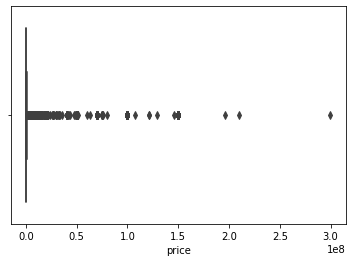

PRICE
Q1 :  35000.0
Q1 :  281000.0
Batas bawah : -334000.0
Batas atas : 650000.0


In [ ]:
sns.boxplot(data = df, x = 'price')
plt.show()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - 1.5*iqr
batas_atas = q3 + 1.5*iqr

print('PRICE')
print('Q1 : ',q1)
print('Q1 : ',q3)
print('Batas bawah :',batas_bawah)
print('Batas atas :',batas_atas)

In [ ]:
outlier_price = df[(df['price']< batas_bawah) | (df['price']> batas_atas)]
len(outlier_price)

10178

Dataframe di atas menunjukkan bahwa **seluruh data** adalah dataframe yang berisi outlier pada kolom `price`.

#####**Product Quantity**

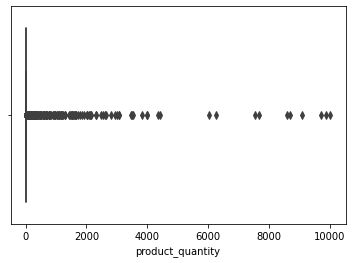

Product Quantity
Q1 :  11
Q1 :  14
Batas bawah : 6.5
Batas atas : 18.5


In [ ]:
sns.boxplot(data = df, x = 'product_quantity')
plt.show()
q1 = df['product_quantity'].quantile(0.25)
q3 = df['product_quantity'].quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - 1.5*iqr
batas_atas = q3 + 1.5*iqr

print('Product Quantity')
print('Q1 : ',q1)
print('Q1 : ',q3)
print('Batas bawah :',batas_bawah)
print('Batas atas :',batas_atas)

In [ ]:
outlier_product_quantity = df[(df['product_quantity']< batas_bawah) | (df['product_quantity']> batas_atas)]
len(outlier_product_quantity)

7171

Dataframe di atas menunjukkan bahwa **seluruh data** adalah dataframe yang berisi outlier pada kolom `product_quantity`.

#####**Percentage Commision**

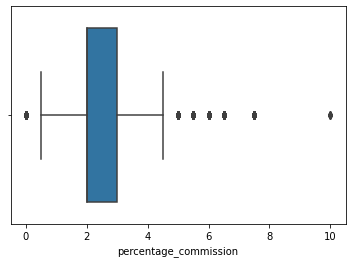

Percentage Commission
Q1 :  2.0
Q1 :  3.0
Batas bawah : 0.5
Batas atas : 4.5


In [ ]:
sns.boxplot(data = df, x = 'percentage_commission')
plt.show()
q1 = df['percentage_commission'].quantile(0.25)
q3 = df['percentage_commission'].quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - 1.5*iqr
batas_atas = q3 + 1.5*iqr

print('Percentage Commission')
print('Q1 : ',q1)
print('Q1 : ',q3)
print('Batas bawah :',batas_bawah)
print('Batas atas :',batas_atas)

In [ ]:
outlier_percentage_commission = df[(df['percentage_commission']< batas_bawah) | (df['percentage_commission']> batas_atas)]
len(outlier_percentage_commission)

14140

Dataframe di atas, sebanyak 14140 baris (dari 56999 baris), adalah dataframe yang berisi outlier pada kolom `percentage_commission`. 

#####**GMV**

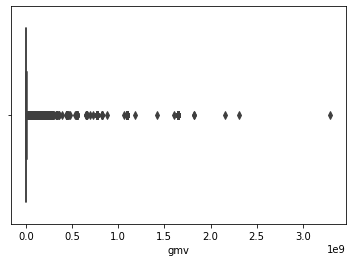

GMV
Q1 :  560000.0
Q1 :  3930640.0
Batas bawah : -4495960.0
Batas atas : 8986600.0


In [ ]:
sns.boxplot(data = df, x = 'gmv')
plt.show()
q1 = df['gmv'].quantile(0.25)
q3 = df['gmv'].quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - 1.5*iqr
batas_atas = q3 + 1.5*iqr

print('GMV')
print('Q1 : ',q1)
print('Q1 : ',q3)
print('Batas bawah :',batas_bawah)
print('Batas atas :',batas_atas)

In [ ]:
outlier_gmv = df[(df['gmv']< batas_bawah) | (df['gmv']> batas_atas)]
len(outlier_gmv)

10498

Dataframe di atas, sebanyak 10498 baris (dari 56999 baris), adalah dataframe yang berisi outlier pada kolom `gmv`. 

#####**Revenue**

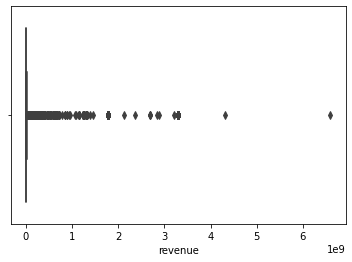

Revenue
Q1 :  770400.0
Q1 :  6164760.0
Batas bawah : -7321140.0
Batas atas : 14256300.0


In [ ]:
sns.boxplot(data = df, x = 'revenue')
plt.show()
q1 = df['revenue'].quantile(0.25)
q3 = df['revenue'].quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - 1.5*iqr
batas_atas = q3 + 1.5*iqr

print('Revenue')
print('Q1 : ',q1)
print('Q1 : ',q3)
print('Batas bawah :',batas_bawah)
print('Batas atas :',batas_atas)

In [ ]:
outlier_revenue = df[(df['revenue']< batas_bawah) | (df['revenue']> batas_atas)]
len(outlier_revenue)

9193

Dataframe di atas, sebanyak 9193 baris (dari 56999 baris), adalah dataframe yang berisi outlier pada kolom `percentage_commission`. 

##**D. DATA TRANSFORMATION**

####**Renaming**

######**Buyer Province Name**

In [ ]:
print('--Before--')
df['buyer_province_name'].value_counts()

--Before--


DKI Jakarta                       11267
Jawa Tengah                       10425
Jawa Barat                         8926
Banten                             7966
Riau                               4833
Dki Jakarta                        4449
Jawa Timur                         3390
Bali                               1751
Kepulauan Riau                     1106
Sumatera Utara                      841
Sumatera Barat                      478
Sumatera Selatan                    471
DI Yogyakarta                       372
Di Yogyakarta                       187
Sulawesi Selatan                    176
Kalimantan Utara                    137
Lampung                              60
Kalimantan Timur                     31
Kalimantan Barat                     26
Jambi                                17
Bangka Belitung                      16
Kalimantan Selatan                   12
Nusa Tenggara Barat                  11
Nanggroe Aceh Darussalam             10
Sulawesi Utara                        9


In [ ]:
df['buyer_province_name']=df['buyer_province_name'].replace({'Dki Jakarta':'DKI Jakarta','Di Yogyakarta': 'DI Yogyakarta',
                                   'Nanggroe Aceh Darussalam (nad)':'Nanggroe Aceh Darussalam',
                                   'Nusa Tenggara Barat (ntb)':'Nusa Tenggara Barat'})

In [ ]:
print('--After--')
df['buyer_province_name'].value_counts()

--After--


DKI Jakarta                 15716
Jawa Tengah                 10425
Jawa Barat                   8926
Banten                       7966
Riau                         4833
Jawa Timur                   3390
Bali                         1751
Kepulauan Riau               1106
Sumatera Utara                841
DI Yogyakarta                 559
Sumatera Barat                478
Sumatera Selatan              471
Sulawesi Selatan              176
Kalimantan Utara              137
Lampung                        60
Kalimantan Timur               31
Kalimantan Barat               26
Jambi                          17
Bangka Belitung                16
Nusa Tenggara Barat            15
Nanggroe Aceh Darussalam       15
Kalimantan Selatan             12
Sulawesi Utara                  9
Bengkulu                        5
Kalimantan Tengah               4
Gorontalo                       3
Sulawesi Tenggara               3
Nusa Tenggara Timur             2
Maluku                          2
Maluku Utara  

#####**Order source**

In [ ]:
print('--Before--')
df['order_source'].value_counts()

--Before--


Android       34868
website       18190
Web Ralali     1772
CMS            1364
ios             805
Name: order_source, dtype: int64

In [ ]:
df['order_source']=df['order_source'].replace({'Web Ralali':'website'})

In [ ]:
print('--After--')
df['order_source'].value_counts()

--After--


Android    34868
website    19962
CMS         1364
ios          805
Name: order_source, dtype: int64

#####**Payment Method**

In [ ]:
print('--Before--')
df['payment_method'].value_counts()

--Before--


BCA Bank Transfer           32060
BCA                          8084
Ralali Wallet                6405
Mandiri                      1957
Bank BCA                     1729
BNI                          1628
BRI Bank Transfer            1239
Mandiri Bank Transfer         881
BNI Bank Transfer             779
BRI                           776
Credit Card                   557
Ovo                           456
Permata                       203
BII                            64
Payment Nothing                63
Mandiri Internet Banking       59
DBS Bank Transfer              31
Kredivo                        26
BCA Klik Pay                    2
Name: payment_method, dtype: int64

In [ ]:
df['payment_method']=df['payment_method'].replace({'BCA Bank Transfer':'BCA','Bank BCA': 'BCA',
                                   'BCA Klik Pay':'BCA', 'Mandiri Bank Transfer':'Mandiri', 
                                   'Mandiri Internet Banking' : 'Mandiri','BNI Bank Transfer':'BNI',
                                   'BNI Bank Transfer':'BNI','BRI Bank Transfer':'BRI','DBS Bank Transfer':'DBS'})

In [ ]:
print('--After--')
df['payment_method'].value_counts()

--After--


BCA                41875
Ralali Wallet       6405
Mandiri             2897
BNI                 2407
BRI                 2015
Credit Card          557
Ovo                  456
Permata              203
BII                   64
Payment Nothing       63
DBS                   31
Kredivo               26
Name: payment_method, dtype: int64

####**Change data type**

#####Datetime64[ns,UTC] to Datetime64[ns]
We need to change the datatype for csv could detect the datetime with this new format which is without utc

In [ ]:
df['order_datetime'] = pd.to_datetime(df.order_datetime).dt.tz_localize(None)
df['payment_datetime'] = pd.to_datetime(df.payment_datetime).dt.tz_localize(None)
df['processed_datetime'] = pd.to_datetime(df.processed_datetime).dt.tz_localize(None)
df['delivered_datetime'] = pd.to_datetime(df.delivered_datetime).dt.tz_localize(None)
df['received_datetime'] = pd.to_datetime(df.received_datetime).dt.tz_localize(None)
df['settled_datetime'] = pd.to_datetime(df.settled_datetime).dt.tz_localize(None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56999 entries, 0 to 56998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               56999 non-null  object        
 1   oder_detail_id         56999 non-null  object        
 2   order_datetime         56999 non-null  datetime64[ns]
 3   item_id                56999 non-null  object        
 4   item_name              56999 non-null  object        
 5   cat_name               56999 non-null  object        
 6   price                  56999 non-null  float64       
 7   product_quantity       56999 non-null  Int64         
 8   percentage_commission  56999 non-null  float64       
 9   payment_method         56999 non-null  object        
 10  payment_datetime       56999 non-null  datetime64[ns]
 11  processed_datetime     53325 non-null  datetime64[ns]
 12  delivered_datetime     52995 non-null  datetime64[ns]
 13  r

## **E. Explorary Data Analysis**

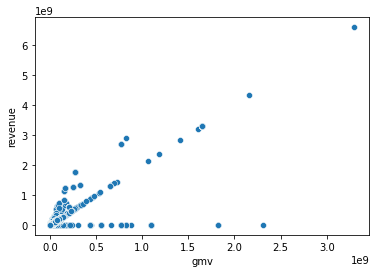

In [ ]:
sns.scatterplot(data = df, x = 'gmv', y = 'revenue')

In [ ]:
df.corr('pearson')

,price,product_quantity,percentage_commission,gmv,revenue
price,1.000000,-0.007430,-0.045398,0.995959,0.745424
product_quantity,-0.007430,1.000000,-0.001343,0.015447,0.016196
percentage_commission,-0.045398,-0.001343,1.000000,-0.043423,0.080666
gmv,0.995959,0.015447,-0.043423,1.000000,0.751861
revenue,0.745424,0.016196,0.080666,0.751861,1.000000


Korelasi antara `gmv` dan `revenue` sangat kuat dengan korelasi sebesar 0.751861

Berikut penentuan seberapa kuat suatu hubungan antara kedua variabel: 

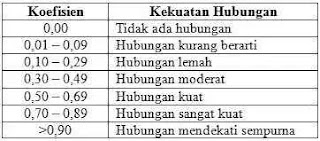


## Dataframe (After Cleansing)

In [ ]:
df

,order_id,oder_detail_id,order_datetime,item_id,item_name,cat_name,price,product_quantity,percentage_commission,payment_method,...,received_datetime,settled_datetime,buyer_id,seller_id,order_source,buyer_province_name,buyer_city_name,logistic_name,gmv,revenue
0,vWtd1y0/6huGN2/XeVvDsuZQoDwatiNmUATDyiR+T176ru...,5F+Im4Nc+NUSZqLbx+X1eDrweIh5M0spYtS/UdcVA7aaJ+...,2018-01-24 23:08:46+00:00,FiwEDZtpOyYWv3+YJlwOSL3tBRSsNNNNDddisUbym/nJPF...,IC LOCK Alarm Sepeda Motor Tipe 1L 1 Sandi,Automotive & Transportation,70000.0,11,0.0,BCA,...,2018-01-31 22:05:59+00:00,2018-02-02 11:11:11+00:00,4bS8qFKVzWcs1YbiN1AH69caS28RLKfoD9Sw5mhywcKLRy...,+4nL+1ptdvhVGUOs4XRPWrfX7udjVZHeHD5QumR31VzOzx...,website,Banten,Tangerang,SAP Express,770000.0,0.0
1,hYo6AokZ1bqrZlrc/eMvqqaODQGiv5/TmUFtzkYTuY5jDZ...,X1hbQ/Sk8go6uIIMeGCtodTT1RHe747Bfix4NRcsVSMVMw...,2018-03-12 15:18:13+00:00,GYSx7Gu3Wy/DC3c/QEHBotPs/OIE1QDfKwTyWqEHhb626J...,Sleeping Bag Ultralight Packing,"Beauty, Sport & Fashion",106900.0,11,0.0,BCA,...,2018-03-17 17:33:12+00:00,2018-03-19 17:49:29+00:00,gIMTtuVLpqhxr1vGQUX7z/9BsLfyuIEsw9adNH5RFCmJoJ...,+7J29u1/MoqIdao5nXk+a154wh0xn5yHpNAlO+cMMagBg3...,website,Jawa Barat,Bandung,TIKI,1175900.0,0.0
2,aZYLoHJEF14rPOHWczVrCzZHEbwv72w9yVEOtCVNQoeA3+...,GR22NQrEEEj8H0xYK5+06Ivz/pw7kkM6PRfduolAeb2waS...,2018-02-01 20:16:19+00:00,GYSx7Gu3Wy/DC3c/QEHBotPs/OIE1QDfKwTyWqEHhb626J...,Sleeping Bag Ultralight Packing,"Beauty, Sport & Fashion",106900.0,11,0.0,Mandiri,...,2018-02-03 13:48:44+00:00,2018-02-05 11:37:35+00:00,iAM0QYDk/thCNhc2NLA5XjAH/wCIcbwgWXK3DpWRfOiohn...,+7J29u1/MoqIdao5nXk+a154wh0xn5yHpNAlO+cMMagBg3...,website,DKI Jakarta,Jakarta Pusat,TIKI,1175900.0,0.0
3,aYEM8mBNtgtgtwiXy8o7KoVr7dD8S6remri7NnvTgFprLo...,I224XW2xDNCFAAe6UMFftC9alJNKABfKg9GKaNlLaYKyJI...,2018-01-15 15:49:58+00:00,GYSx7Gu3Wy/DC3c/QEHBotPs/OIE1QDfKwTyWqEHhb626J...,Sleeping Bag Ultralight Packing,"Beauty, Sport & Fashion",106900.0,11,0.0,BNI,...,2018-01-22 05:12:20+00:00,2018-01-23 10:55:22+00:00,VNegkSBXo6FoVwuapctbPQhm52bDXytLzTfg4jeLYvUYZC...,+7J29u1/MoqIdao5nXk+a154wh0xn5yHpNAlO+cMMagBg3...,website,Banten,Tangerang,TIKI,1175900.0,0.0
4,fLtNp9wUwKF9DdhOTfsq9mBjgBiPGTYdIVIthaxC5klNh8...,4o+vKqCoSfwwEga/7WeHhYwpvRT9NN7G+u2yhnQuAiv+72...,2018-01-15 15:01:33+00:00,GYSx7Gu3Wy/DC3c/QEHBotPs/OIE1QDfKwTyWqEHhb626J...,Sleeping Bag Ultralight Packing,"Beauty, Sport & Fashion",106900.0,11,0.0,Credit Card,...,2018-01-16 23:00:51+00:00,2018-01-18 17:50:05+00:00,u+5n7OUaW4Az4ltUSf1kdFhb7aAbCYuQyNDuEDAQNucW5x...,+7J29u1/MoqIdao5nXk+a154wh0xn5yHpNAlO+cMMagBg3...,website,DKI Jakarta,Jakarta Barat,JNE,1175900.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56994,hMNVJu7pe/56r9IMer9EOhMaspNepjbOjY+yzwuxhbyMeX...,ubvMK0JvvfzZqdH7NPiZDJfMtaWZF0JMKJ0flm/n/BrYXj...,2020-03-17 08:11:07+00:00,qmY+fo95UnBw5KEdLm+TUDGqv9YHywZCrCDPqFHXNMmO3y...,LENCANA MERAH Tepung Terigu 1kg,Agriculture & Food,20000.0,11,3.0,Ralali Wallet,...,2020-03-17 08:12:00+00:00,2020-03-18 19:16:18+00:00,XS4ZXBjDD6JvT8hoJkwLFFWDEzJRDxfjXEngv1L5OstM7e...,zur/s7B3E92bxS8FkBL9Dx6HA7lKKWGGzSq1qu4HPScnu9...,Android,Kepulauan Riau,Pekanbaru,Free Ongkir Lokal,220000.0,660000.0
56995,Kyr1swAjeR37xIsuF5FDUbp7QtkHWpbNByLa/Smk4It3Jv...,GEn8zsO7m+zvxgj7NUqs9HBwHFOfpA+YY1sbpRq+r5X12f...,2020-01-28 00:57:59+00:00,qmY+fo95UnBw5KEdLm+TUDGqv9YHywZCrCDPqFHXNMmO3y...,LENCANA MERAH Tepung Terigu 1kg,Agriculture & Food,20000.0,11,3.0,Ralali Wallet,...,2020-02-11 00:38:55+00:00,2020-02-12 06:22:14+00:00,yY7Y1kBC0st9xepDZscxyihC+92wnAgt7Su6zegHLKgmRs...,zur/s7B3E92bxS8FkBL9Dx6HA7lKKWGGzSq1qu4HPScnu9...,Android,Riau,Pekanbaru,Free Ongkir Lokal,220000.0,660000.0
56996,vUVI5D2/Fkw+uJCP/prvGKQR7pS6ysgu+YBpy7XKD0LDfI...,wgTA6Nj4X0Sg+468a/zs6g41zZhMOzhScQA4z9kkRSJ8Mt...,2020-01-28 00:51:48+00:00,qmY+fo95UnBw5KEdLm+TUDGqv9YHywZCrCDPqFHXNMmO3y...,LENCANA MERAH Tepung Terigu 1kg,Agriculture & Food,20000.0,11,3.0,Ralali Wallet,...,2020-02-11 00:37:00+00:00,2020-02-12 06:22:14+00:00,ng21FCXnAWPBVkw3e+YokohKEiKwUeMP72oa+NK03

## Transform into CSV

In [ ]:
df.to_csv(r'gpbl_ralali.csv', index=None,header=True)